In [27]:
from IPython.display import display , Image
%matplotlib inline

In [28]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os
import sys
import time

In [30]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, adam, Adadelta

In [31]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [32]:
# data split into train and test 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [33]:
print(x_train.shape, y_train.shape, x_test.shape , y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


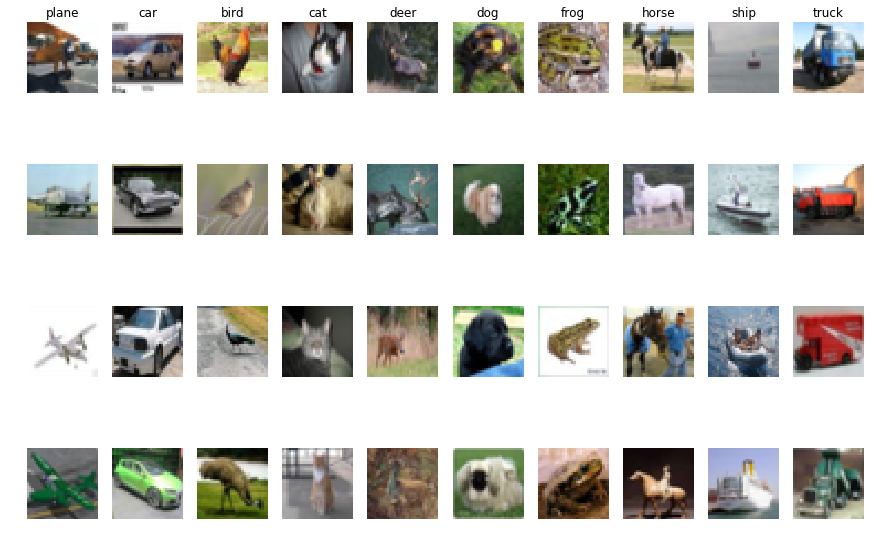

In [34]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.

plt.rcParams['figure.figsize'] = (15, 10)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 4
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [35]:
print('train_samples', x_train.shape[0])
print('test_samples', x_test.shape[0])

train_samples 50000
test_samples 10000


In [36]:
# conbert the class vector to binary class matrics
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [37]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [38]:
model = Sequential()
model.add(Dense(32 , input_shape = x_train.shape[1:], activation = 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation = 'softmax'))
sgd = SGD(lr= 0.001, momentum= 0.9)

In [39]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'Adadelta', metrics= ['accuracy'])

In [40]:
## getting error by using mlp
#model.fit(x_train, y_train, epochs= epochs, batch_size= batch_size, verbose= 1, shuffle= True, validation_data= (x_test, y_test))

# CNN model

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [42]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [17]:
Rms = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adadelta', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train , epochs= epochs, shuffle= True, verbose= 1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 350s 7ms/step - loss: 14.5058 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 364s 7ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 329s 7ms/step - loss: 14.5049 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 334s 7ms/step - loss: 14.5064 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 340s 7ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 343s 7ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
49984/50000 [============================>.] - ETA: 0s - loss: 14.5064 - acc: 0.1000